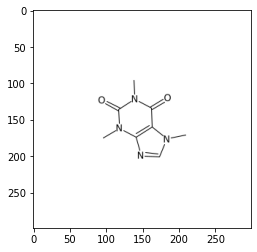

In [26]:
from matplotlib import pyplot as plt
import cv2

img = cv2.imread('caffeine.png')
plt.imshow(img)

Using decimer package available at [this link](https://github.com/Kohulan/DECIMER-Image_Transformer). This package includes three different models:
- Canonical: Model trained on images depicted using canonical SMILES
- Isomeric: Model trained on images depicted using isomeric SMILES, which includes stereochemical information + ions
- Augmented: Model trained on images depicted using isomeric SMILES with augmentations

In [27]:
from decimer import DECIMER
model_name = "Isomeric"
img_path = "caffeine.png"
caffeine_smiles = DECIMER.predict_SMILES(img_path,model_name)
print(caffeine_smiles)

CN1C=NC2=C1C(=O)N(C)C(=O)N2C


As Rocio suggested, we transform smiles encoding into selfies. There is a tool for performing this transformation available at this [GitHub link](https://github.com/aspuru-guzik-group/selfies_tutorial).

In [28]:
from selfies import encoder
translation = encoder(caffeine_smiles)
print(translation)

[C][N][C][=N][C][=C][Ring1][Branch1_1][C][Branch1_2][C][=O][N][Branch1_1][C][C][C][Branch1_2][C][=O][N][Ring1][Branch2_2][C]


S1CSCSCSCSCSCSCSC1SSCSSCSSSSSSSSSSSSSSSSSSSSSSS
[S][C][S][C][S][C][S][C][S][C][S][C][S][C][S][C][Ring1][S][S][S][C][S][S][C][S][S][S][S][S][S][S][S][S][S][S][S][S][S][S][S][S][S][S][S][S][S][S]

CNCCNCCCNCCCCCCCCCCNCCCCCCCNCCNCCNNNNNNNNNNNNNN
[C][N][C][C][N][C][C][C][N][C][C][C][C][C][C][C][C][C][C][N][C][C][C][C][C][C][C][N][C][C][N][C][C][N][N][N][N][N][N][N][N][N][N][N][N][N][N]

NCNCNCCNCCNCCNCCNCCNCCNCCCCCCCCCCCCCCPCPPPPPPPP
[N][C][N][C][N][C][C][N][C][C][N][C][C][N][C][C][N][C][C][N][C][C][N][C][C][C][C][C][C][C][C][C][C][C][C][C][C][P][C][P][P][P][P][P][P][P][P]


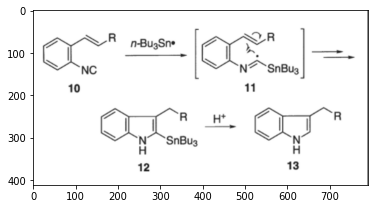

In [29]:
simple_mechanism = cv2.imread('test_images_pptx/12.2.png')
plt.imshow(simple_mechanism)

smiles_code = DECIMER.predict_SMILES('test_images_pptx/12.2.png',"Canonical")
print(smiles_code)
print(encoder(smiles_code))
print()

smiles_code = DECIMER.predict_SMILES('test_images_pptx/12.2.png',"Isomeric")
print(smiles_code)
print(encoder(smiles_code))
print()

smiles_code = DECIMER.predict_SMILES('test_images_pptx/12.2.png',"Augmented")
print(smiles_code)
print(encoder(smiles_code))

N#CC1CCCC=C2C=CC1CCCCCCCC2(C#N)CCOOSO
[N][#C][C][C][C][C][C][=C][C][=C][C][Ring1][Branch2_2][C][C][C][C][C][C][C][C][Ring1][N][Branch1_1][Ring1][C][#N][C][C][O][O][S][O]
COCOC=C1C=CC=CC=CC=CC2C#CCC#CC1NOOSS2
[C][O][C][O][C][=C][C][=C][C][=C][C][=C][C][=C][C][C][#C][C][C][#C][C][Ring1][S][N][O][O][S][S][Ring1][N]
CCOONOCONC13CC=C2C=CCCC(CC1CCC#C2)C3NC#N
[C][C][O][O][N][O][C][O][N][C][C][C][=C][C][=C][C][C][C][Branch1_1][O][C][C][Ring1][O][C][C][C][#C][Ring1][N][C][Ring1][S][N][C][#N]


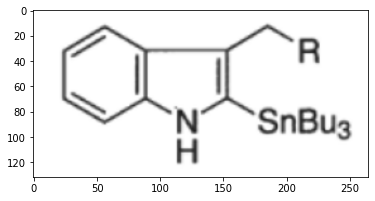

In [30]:
simple_molecule = cv2.imread('test_images_pptx/12.2_molecule.png')
plt.imshow(simple_molecule)

smiles_code = DECIMER.predict_SMILES('test_images_pptx/12.2_molecule.png',"Canonical")
print(smiles_code)
print(encoder(smiles_code))

smiles_code = DECIMER.predict_SMILES('test_images_pptx/12.2_molecule.png',"Isomeric")
print(smiles_code)
print(encoder(smiles_code))

smiles_code = DECIMER.predict_SMILES('test_images_pptx/12.2_molecule.png',"Augmented")
print(smiles_code)
print(encoder(smiles_code))

As we can see, results are not good. Let's try with an image with higher resolution. We will only perform experiments using the `isometric` configuration, as is the one that recognizes more complex structures.

In [31]:
def plot_and_process(img_path, config):
    img = cv2.imread(img_path)
    plt.imshow(img)

    smiles_code = DECIMER.predict_SMILES(img_path,config)
    print(smiles_code)

C=NN1NNN2NNNNNNNNNNNNNNNN1NN2N=O


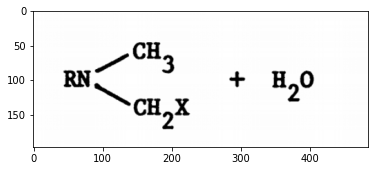

In [32]:
img_path = 'test_images_pptx/9_clean_molecule.png'
plot_and_process(img_path, 'Isomeric')

CONN1N=NN=NN=NN=NN=NN=NNNNNN=NN1


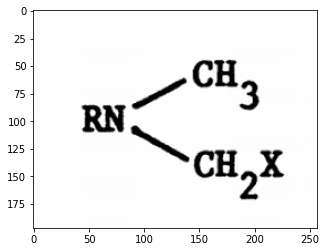

In [34]:
img_path = 'test_images_pptx/9_clean_molecule_2.png'
plot_and_process(img_path, 'Isomeric')

PPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPP


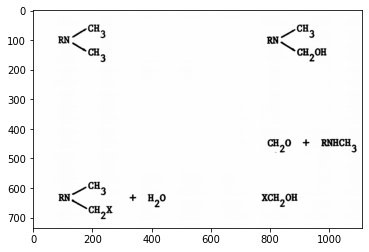

In [35]:
img_path = 'test_images_pptx/9_clean.png'
plot_and_process(img_path, 'Isomeric')

CSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSS


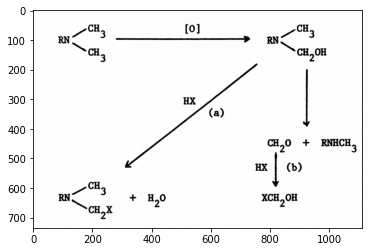

In [36]:
img_path = 'test_images_pptx/9.png'
plot_and_process(img_path, 'Isomeric')

Bad results. Let's try again with another image, more similar to the one given as example by the documentation.

COCNCNCNCOCCNCCCCCCC1CCCN=CCCCCNC1CNCNCNNNCNCN


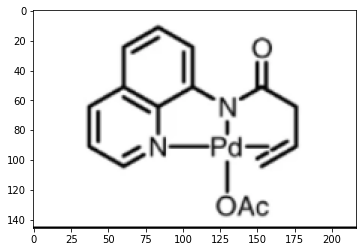

In [37]:
img_path = 'test_images_pptx/10_clean_molecule.png'
plot_and_process(img_path, 'Isomeric')